# Context

# ***Sales Prediction***

[Dataset](https://www.kaggle.com/datasets/sureshmecad/supplement-sales-prediction?select=TRAIN.csv)

Your Client WOMart is a leading nutrition and supplement retail chain that offers a comprehensive range of products for all your wellness and fitness needs.WOMart follows a multi-channel distribution strategy with 350+ retail stores spread across 100+ cities.Effective forecasting for store sales gives essential insight into upcoming cash flow, meaning WOMart can more accurately plan the cashflow at the store level.

Sales data for 18 months from 365 stores of WOMart is available along with information on Store Type, Location Type for each store, Region Code for every store, Discount provided by the store on every day, Number of Orders everyday etc.

Task is Sales Prediction

Artificial Intelligence predicts future sales on basis of previous sales info.

##Dataset

The dataset consists of the following information of sales of the past 18 months along with:

ID: Unique identifier for a row

Store id: Unique id for each store

Store type: Type of the store

Location type: Type of the location where the store is located

Region Code: Code of the region where the store is located

Date: Information about the date

Holiday: If there is a holiday on the given date

Discount: If the store offers a discount on the given date

***Sales forecasting*** is a crucial ingredient of every expanding retail business. Without a precise sales forecast system, it becomes almost unmanageable to have the correct quantity of stock on hand at any given moment.

# Installing the Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes=True)

In [ ]:
df = pd.read_csv('TRAIN.csv')
df.head()

ID  Store_id Store_Type Location_Type Region_Code        Date  \
0  T1000001         1         S1            L3          R1  2018-01-01   
1  T1000002       253         S4            L2          R1  2018-01-01   
2  T1000003       252         S3            L2          R1  2018-01-01   
3  T1000004       251         S2            L3          R1  2018-01-01   
4  T1000005       250         S2            L3          R4  2018-01-01   

   Holiday Discount  #Order     Sales  
0        1      Yes       9   7011.84  
1        1      Yes      60  51789.12  
2        1      Yes      42  36868.20  
3        1      Yes      23  19715.16  
4        1      Yes      62  45614.52

# Data Preprocessing Part 1

In [ ]:
#Check the number of unique value on object datatype
df.select_dtypes(include='object').nunique()

ID               127021
Store_Type            4
Location_Type         5
Region_Code           4
Date                349
Discount              2
dtype: int64

In [ ]:
# Number of Store_id unique value
df.Store_id.nunique()

365

In [ ]:
# Drop ID and Store ID Column because its unnecesary
df.drop(columns=['ID','Store_id'], inplace=True)
df.head()

Store_Type Location_Type Region_Code        Date  Holiday Discount  #Order  \
0         S1            L3          R1  2018-01-01        1      Yes       9   
1         S4            L2          R1  2018-01-01        1      Yes      60   
2         S3            L2          R1  2018-01-01        1      Yes      42   
3         S2            L3          R1  2018-01-01        1      Yes      23   
4         S2            L3          R4  2018-01-01        1      Yes      62   

      Sales  
0   7011.84  
1  51789.12  
2  36868.20  
3  19715.16  
4  45614.52

In [ ]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Exploratory Data Analysis

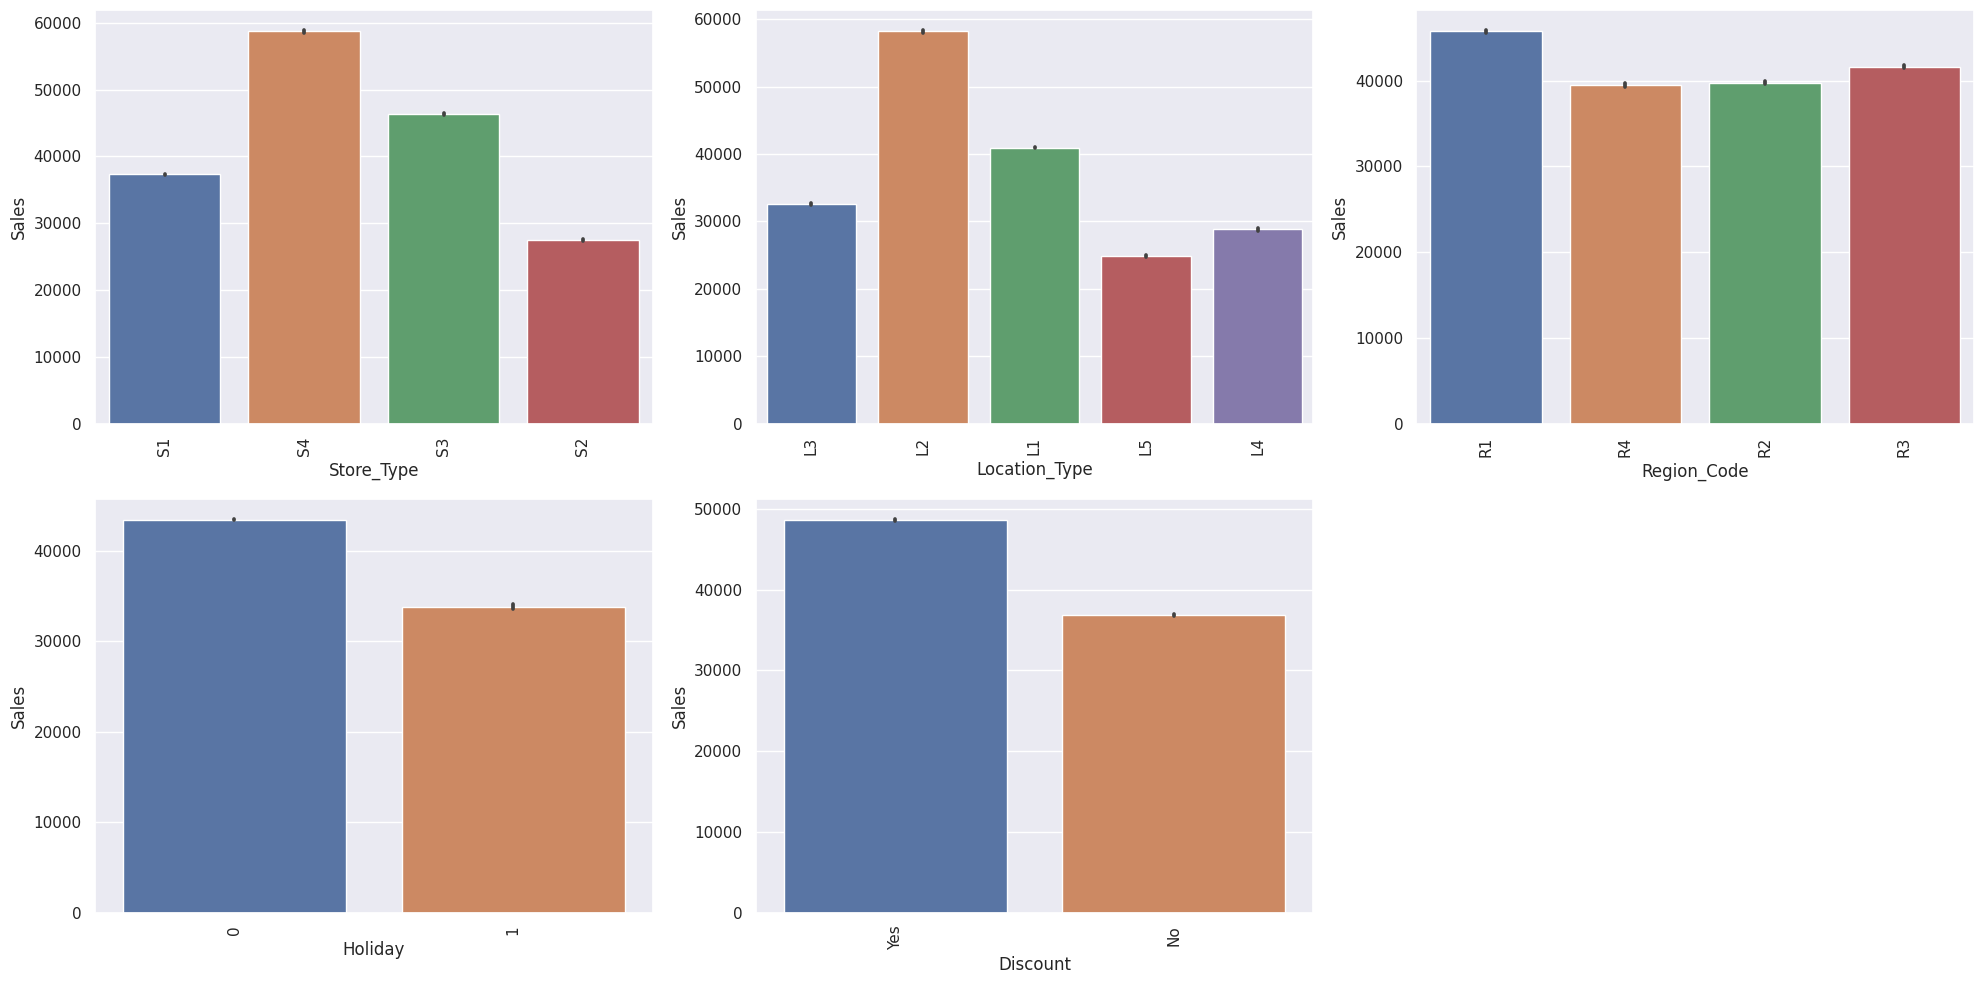

In [ ]:
# list of categorical variables to plot
cat_vars = ['Store_Type', 'Location_Type', 'Region_Code', 'Holiday',
            'Discount']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='Sales', data=df, ax=axs[i], estimator=np.mean)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# remove the sixth subplot
fig.delaxes(axs[5])

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

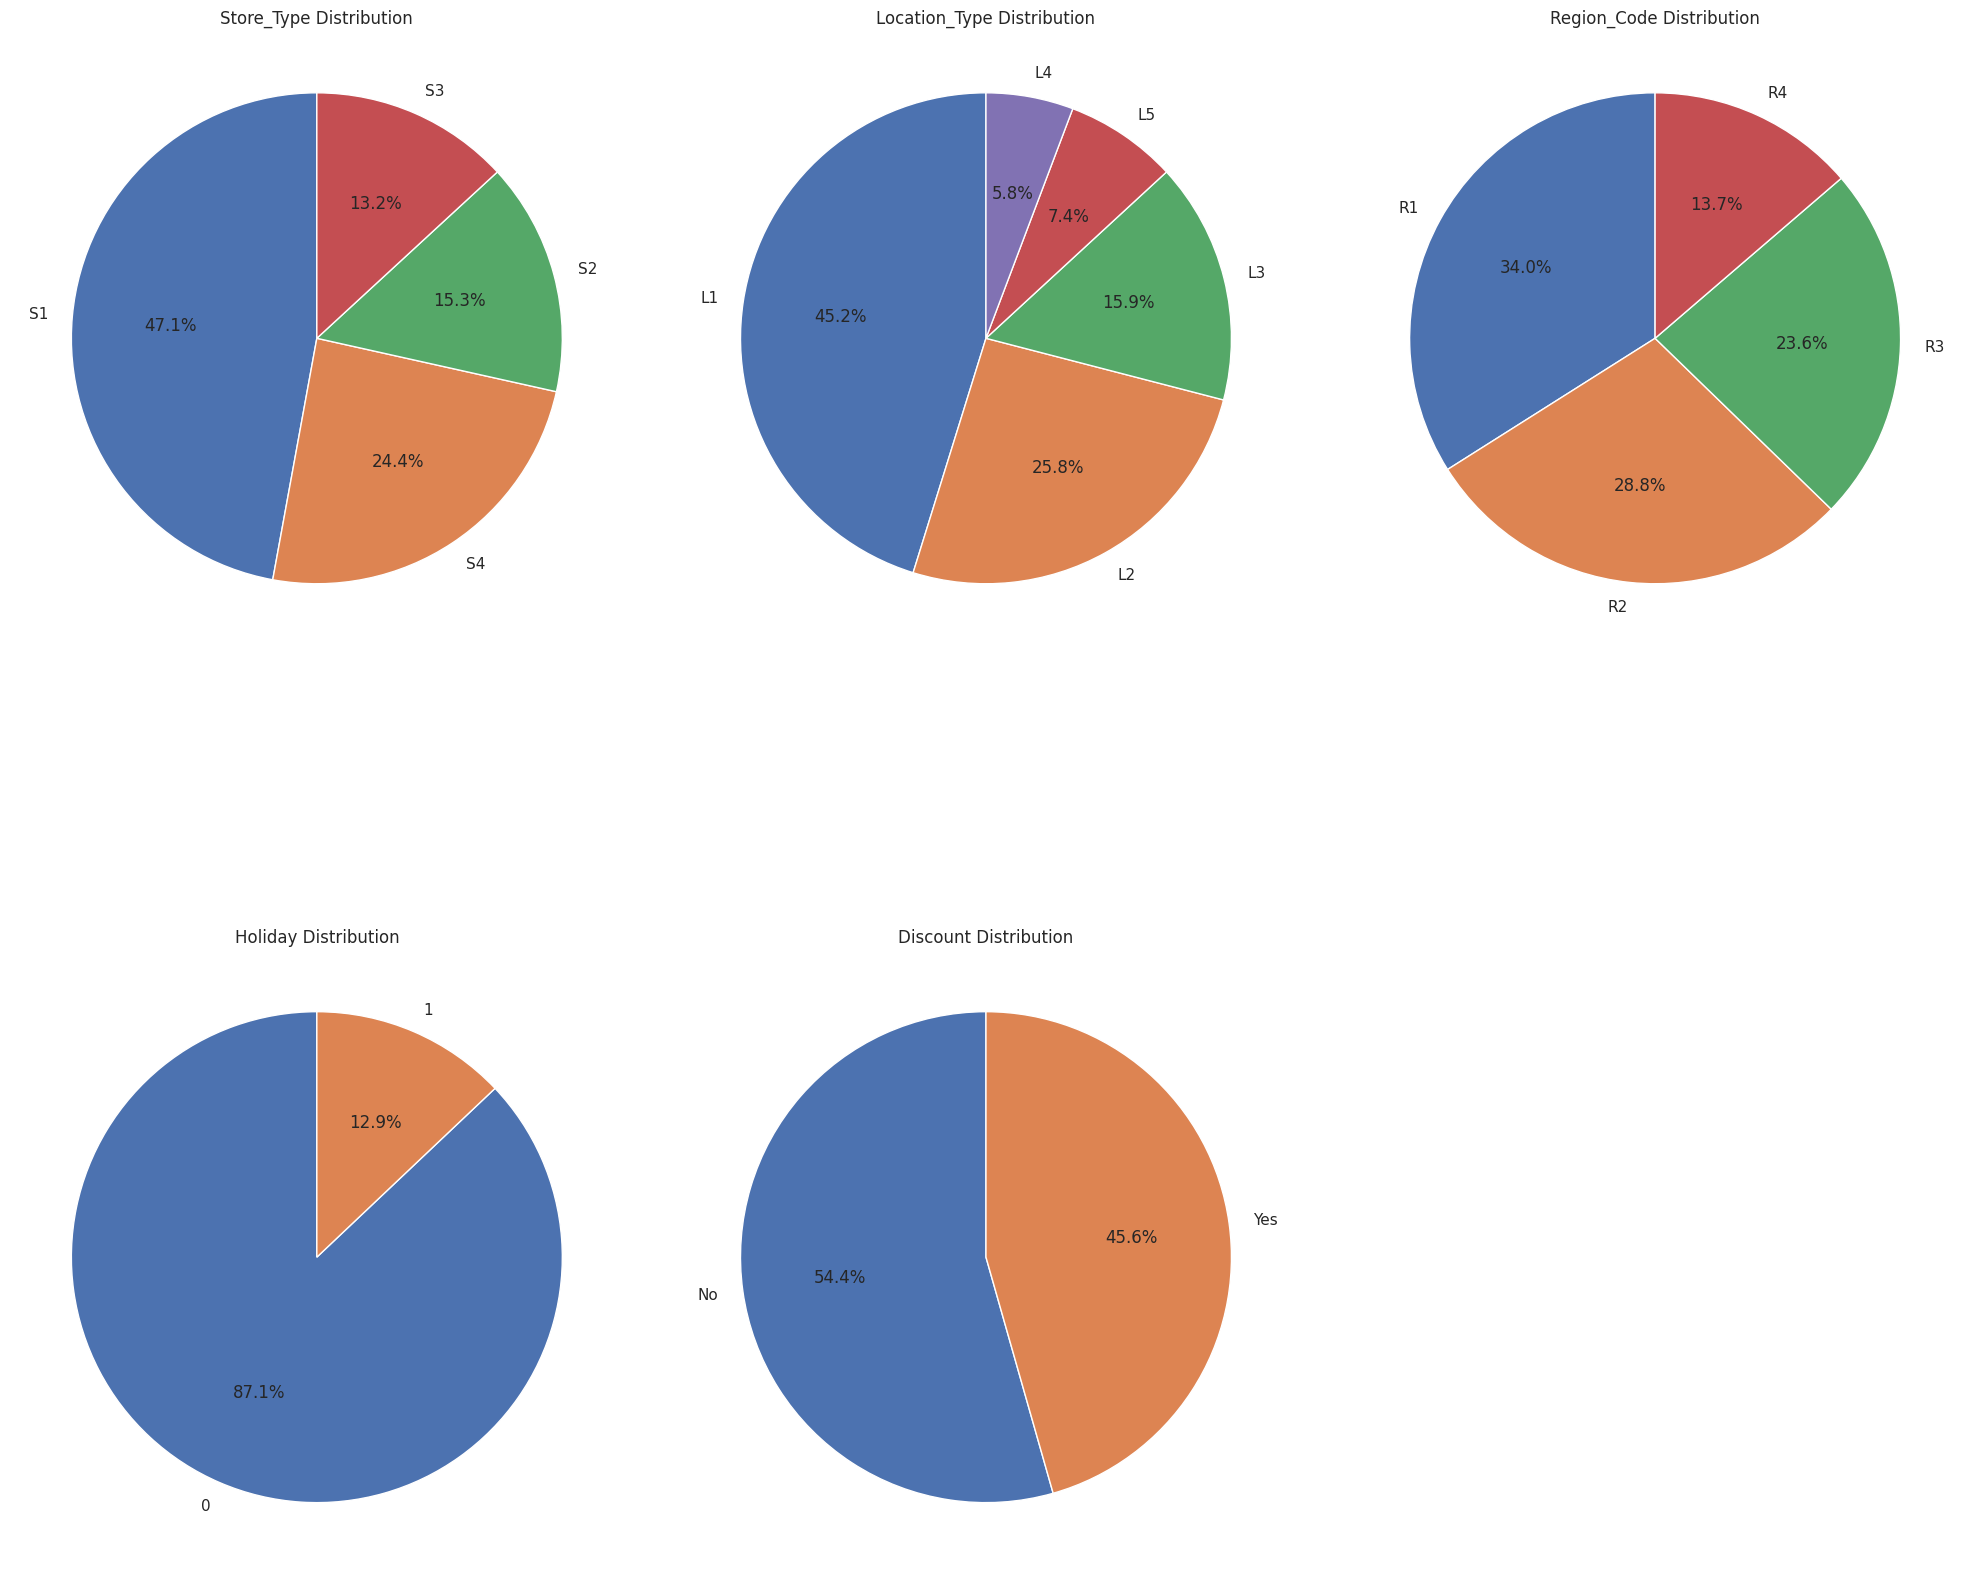

In [ ]:
cat_vars = ['Store_Type', 'Location_Type', 'Region_Code', 'Holiday',
            'Discount']

# create a figure and axes
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))

# create a pie chart for each categorical variable
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        # count the number of occurrences for each category
        cat_counts = df[var].value_counts()

        # create a pie chart
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

        # set a title for each subplot
        axs.flat[i].set_title(f'{var} Distribution')

# adjust spacing between subplots
fig.tight_layout()

# remove sixt plot
fig.delaxes(axs[1][2])

# show the plot
plt.show()

<Axes: xlabel='#Order'>

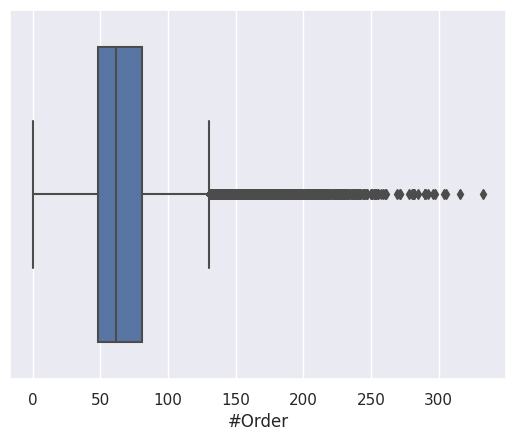

In [ ]:
sns.boxplot(x='#Order', data=df)

<Axes: xlabel='#Order'>

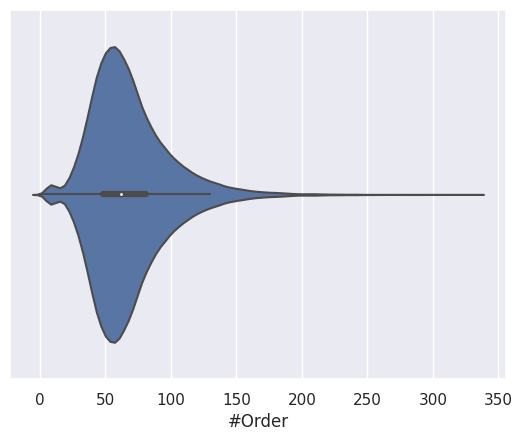

In [ ]:
sns.violinplot(x='#Order', data=df)

<ipython-input-11-65db7de4b2ed>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Date', y='Sales', hue='Store_Type', data=df, ci=None, estimator='mean', alpha=0.7)


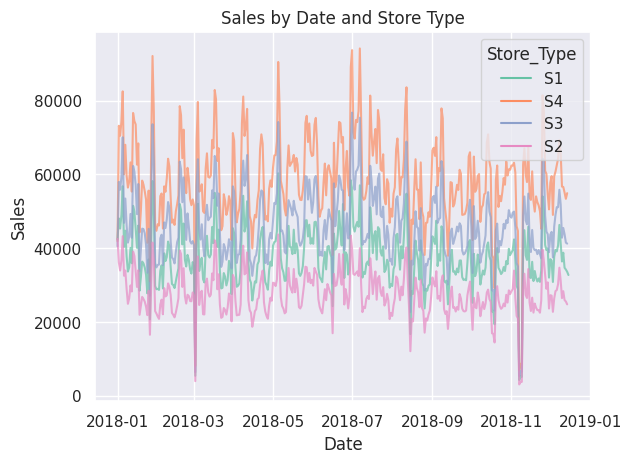

In [ ]:
sns.set_style("darkgrid")
sns.set_palette("Set2")

sns.lineplot(x='Date', y='Sales', hue='Store_Type', data=df, ci=None, estimator='mean', alpha=0.7)

plt.title("Sales by Date and Store Type")
plt.xlabel("Date")
plt.ylabel("Sales")

plt.show()

<ipython-input-12-62a4becd9aab>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Date', y='Sales', hue='Location_Type', data=df, ci=None, estimator='mean', alpha=0.7)


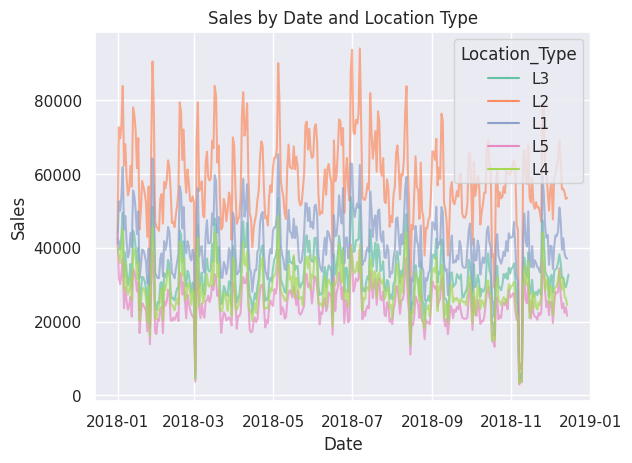

In [ ]:
sns.set_style("darkgrid")
sns.set_palette("Set2")

sns.lineplot(x='Date', y='Sales', hue='Location_Type', data=df, ci=None, estimator='mean', alpha=0.7)

plt.title("Sales by Date and Location Type")
plt.xlabel("Date")
plt.ylabel("Sales")

plt.show()

<ipython-input-13-d0c87c02b59e>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Date', y='Sales', hue='Region_Code', data=df, ci=None, estimator='mean', alpha=0.7)


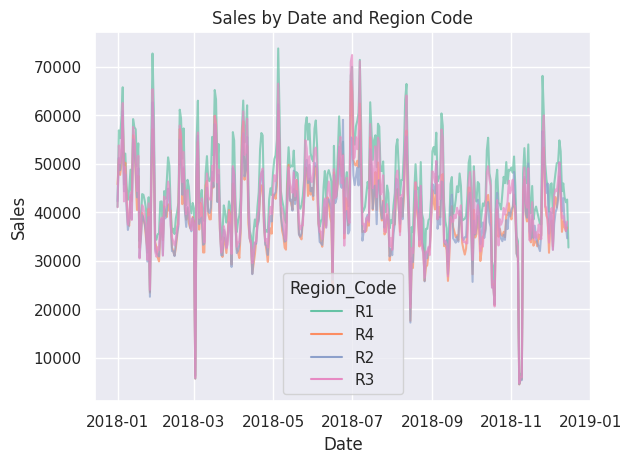

In [ ]:
sns.set_style("darkgrid")
sns.set_palette("Set2")

sns.lineplot(x='Date', y='Sales', hue='Region_Code', data=df, ci=None, estimator='mean', alpha=0.7)

plt.title("Sales by Date and Region Code")
plt.xlabel("Date")
plt.ylabel("Sales")

plt.show()

<ipython-input-14-fe82e03fc75c>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Date', y='Sales', hue='Holiday', data=df, ci=None, estimator='mean', alpha=0.7)


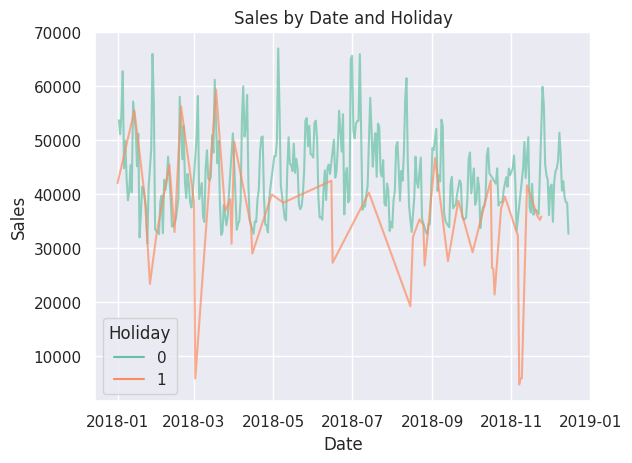

In [ ]:
sns.set_style("darkgrid")
sns.set_palette("Set2")

sns.lineplot(x='Date', y='Sales', hue='Holiday', data=df, ci=None, estimator='mean', alpha=0.7)

plt.title("Sales by Date and Holiday")
plt.xlabel("Date")
plt.ylabel("Sales")

plt.show()

<ipython-input-15-1ae2d2f77726>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Date', y='Sales', hue='Discount', data=df, ci=None, estimator='mean', alpha=0.7)


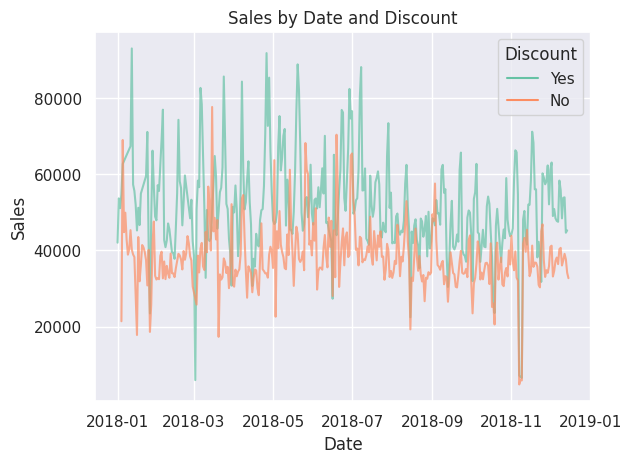

In [ ]:
sns.set_style("darkgrid")
sns.set_palette("Set2")

sns.lineplot(x='Date', y='Sales', hue='Discount', data=df, ci=None, estimator='mean', alpha=0.7)

plt.title("Sales by Date and Discount")
plt.xlabel("Date")
plt.ylabel("Sales")

plt.show()

<Axes: xlabel='#Order', ylabel='Sales'>

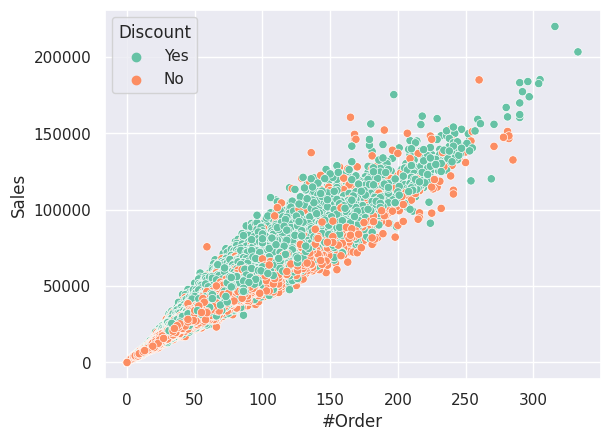

In [ ]:
sns.scatterplot(x='#Order', y='Sales', hue='Discount', data=df)

<Axes: xlabel='#Order', ylabel='Sales'>

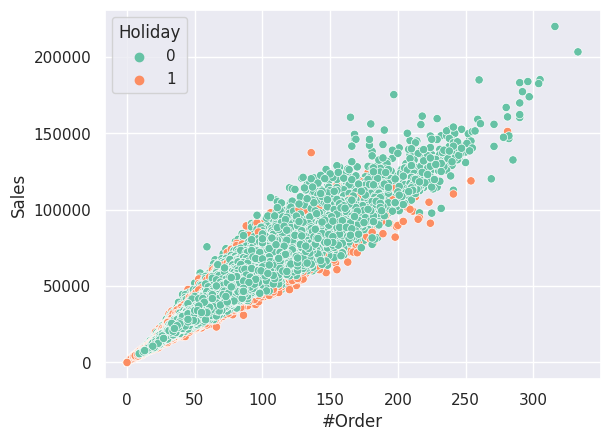

In [ ]:
sns.scatterplot(x='#Order', y='Sales', hue='Holiday', data=df)

# Data Preprocessing Part 2

In [ ]:
#Check missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

In [ ]:
df.shape

(127021, 8)

In [ ]:
df.drop(columns='Date', inplace=True)
df.head()

Store_Type Location_Type Region_Code  Holiday Discount  #Order     Sales
0         S1            L3          R1        1      Yes       9   7011.84
1         S4            L2          R1        1      Yes      60  51789.12
2         S3            L2          R1        1      Yes      42  36868.20
3         S2            L3          R1        1      Yes      23  19715.16
4         S2            L3          R4        1      Yes      62  45614.52

# Label Encoding for Object datatype

In [ ]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

Store_Type: ['S1' 'S4' 'S3' 'S2']
Location_Type: ['L3' 'L2' 'L1' 'L5' 'L4']
Region_Code: ['R1' 'R4' 'R2' 'R3']
Discount: ['Yes' 'No']


In [ ]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())

    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])

    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

Store_Type: [0 3 2 1]
Location_Type: [2 1 0 4 3]
Region_Code: [0 3 1 2]
Discount: [1 0]


# Correlation Heatmap

<Axes: >

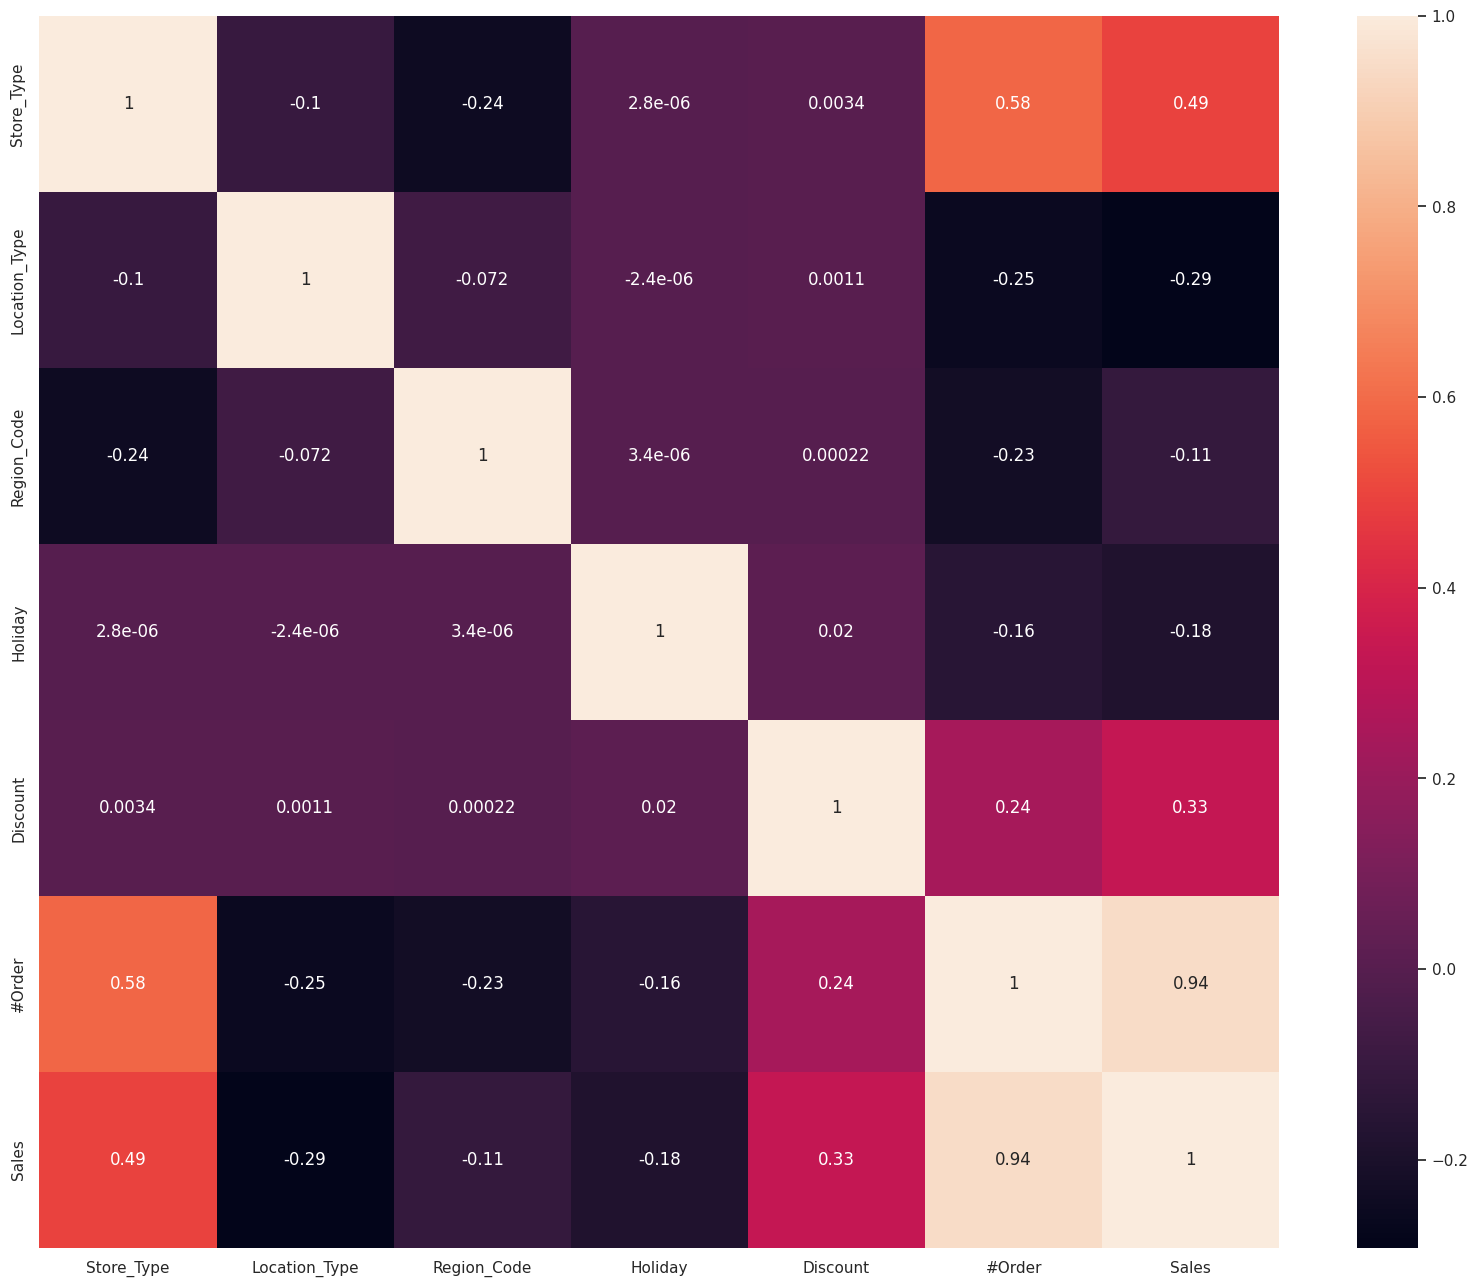

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

# Train Test Split For Sales Prediction

In [ ]:
from sklearn.model_selection import train_test_split

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Sales', axis=1), df['Sales'], test_size=0.2, random_state=0)

# Remove Outlier Using IQR

In [ ]:
# Concatenate X_train and y_train for outlier removal
train_df = pd.concat([X_train, y_train], axis=1)

# Calculate the IQR values for each column
Q1 = train_df.quantile(0.25)
Q3 = train_df.quantile(0.75)
IQR = Q3 - Q1

# Remove outliers from X_train
train_df = train_df[~((train_df < (Q1 - 1.5 * IQR)) | (train_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Separate X_train and y_train after outlier removal
X_train = train_df.drop('Sales', axis=1)
y_train = train_df['Sales']

# 3. Model

# 3.1 Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
#from sklearn.datasets import load_boston


# Create a DecisionTreeRegressor object
dtree = DecisionTreeRegressor()

# Define the hyperparameters to tune and their values
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

{'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2}


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=0, max_depth=8, max_features='auto', min_samples_leaf=4, min_samples_split=2)
dtree.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_leaf=4,
                      random_state=0)

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = dtree.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 3858.148907533805
MAPE is 0.08766059003335647
MSE is 42971920.60845397
R2 score is 0.8626487453100908
RMSE score is 6555.297141125943


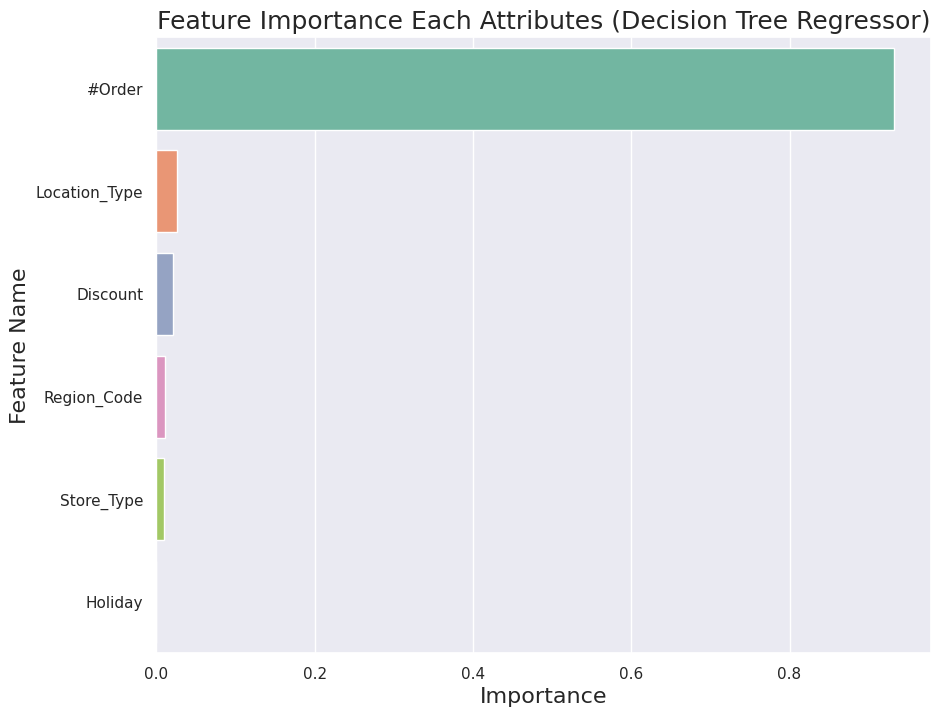

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Decision Tree Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 14.6 MB/s eta 0:00:00


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


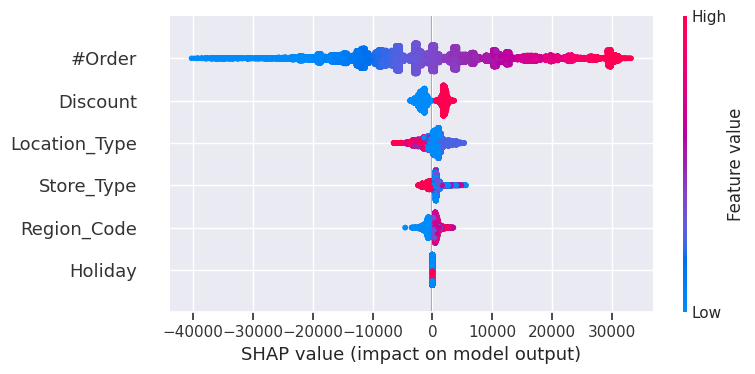

In [ ]:
!pip install shap
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

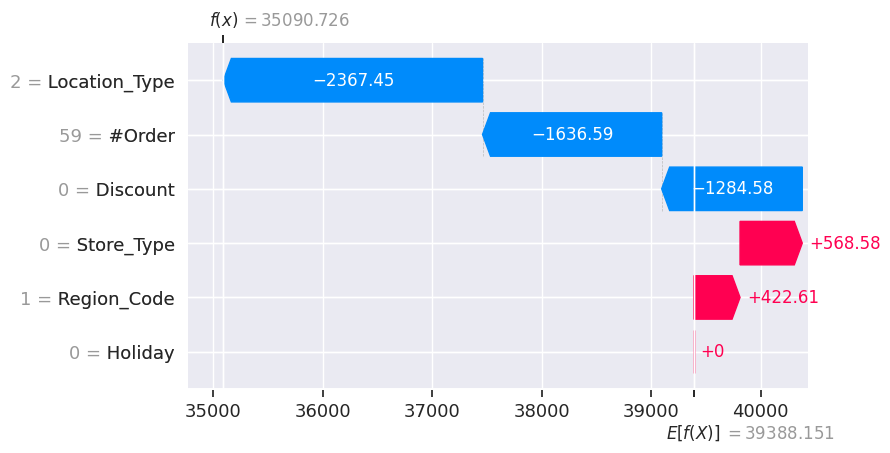

In [ ]:
explainer = shap.Explainer(dtree, X_test, check_additivity=False)
shap_values = explainer(X_test, check_additivity=False)
shap.plots.waterfall(shap_values[0])

# 3.2 Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Create a Random Forest Regressor object
rf = RandomForestRegressor()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
`max

Best hyperparameters:  {'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0, max_depth=9, min_samples_split=5, min_samples_leaf=2,
                           max_features='auto')
rf.fit(X_train, y_train)

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


RandomForestRegressor(max_depth=9, max_features='auto', min_samples_leaf=2,
                      min_samples_split=5, random_state=0)

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = rf.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 3614.81156097858
MAPE is 59999717909051.25
MSE is 39292568.246591724
R2 score is 0.8744090682417273
RMSE score is 6268.378438367591


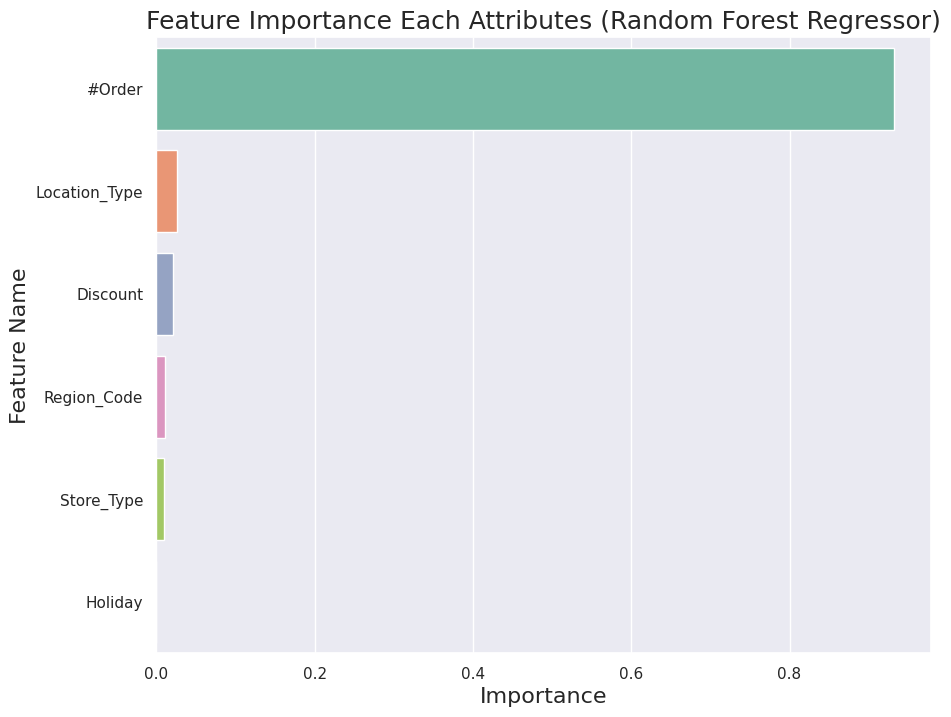

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Random Forest Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


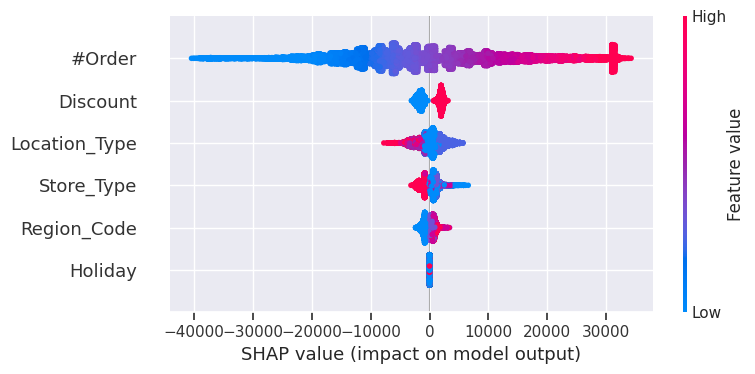

In [ ]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

100%|===================| 25291/25405 [03:15<00:00]       

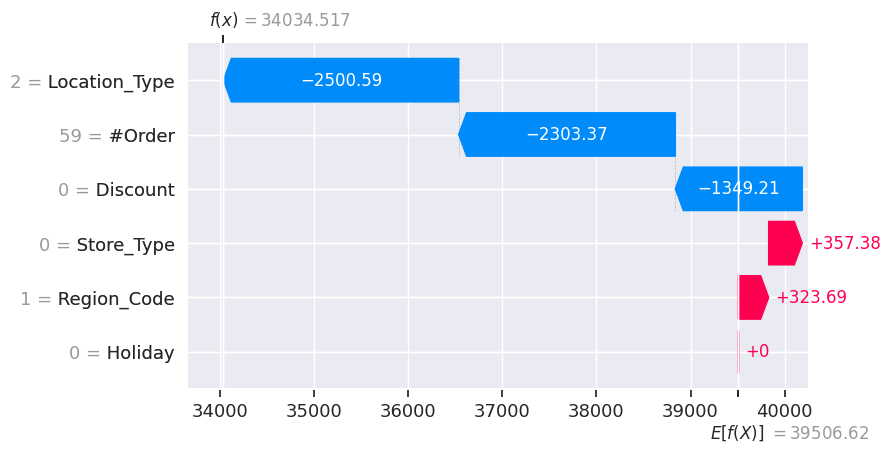

In [ ]:
explainer = shap.Explainer(rf, X_test, check_additivity=False)
shap_values = explainer(X_test, check_additivity=False)
shap.plots.waterfall(shap_values[0])

# 3.2  Other Models

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 2.2 MB/s eta 0:00:00


In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import neighbors
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")

In [ ]:
ridge=Ridge().fit(X_train,y_train)
lasso=Lasso().fit(X_train,y_train)
enet=ElasticNet().fit(X_train,y_train)
knn=KNeighborsRegressor().fit(X_train,y_train)
ada=AdaBoostRegressor().fit(X_train,y_train)
svm=SVR().fit(X_train,y_train)
mlpc=MLPRegressor().fit(X_train,y_train)
dtc=DecisionTreeRegressor().fit(X_train,y_train)

In [ ]:
rf=RandomForestRegressor().fit(X_train,y_train)
xgb=XGBRegressor().fit(X_train,y_train)
gbm=GradientBoostingRegressor().fit(X_train,y_train)
lgb=LGBMRegressor().fit(X_train,y_train)
catbost=CatBoostRegressor().fit(X_train,y_train)

Learning rate set to 0.082498
0:	learn: 12873.3341472	total: 62.4ms	remaining: 1m 2s
1:	learn: 12013.2808361	total: 71.7ms	remaining: 35.8s
2:	learn: 11229.7641892	total: 80.9ms	remaining: 26.9s
3:	learn: 10515.3841800	total: 89.6ms	remaining: 22.3s
4:	learn: 9871.9611966	total: 98.1ms	remaining: 19.5s
5:	learn: 9278.9583814	total: 107ms	remaining: 17.7s
6:	learn: 8741.0300228	total: 116ms	remaining: 16.4s
7:	learn: 8262.4701427	total: 124ms	remaining: 15.4s
8:	learn: 7825.4270327	total: 133ms	remaining: 14.6s
9:	learn: 7437.4535787	total: 143ms	remaining: 14.1s
10:	learn: 7086.2579884	total: 151ms	remaining: 13.6s
11:	learn: 6764.1510793	total: 160ms	remaining: 13.1s
12:	learn: 6473.2471784	total: 168ms	remaining: 12.8s
13:	learn: 6203.6413851	total: 177ms	remaining: 12.4s
14:	learn: 5970.6237436	total: 185ms	remaining: 12.2s
15:	learn: 5756.4227154	total: 200ms	remaining: 12.3s
16:	learn: 5556.4302601	total: 208ms	remaining: 12.1s
17:	learn: 5385.3584359	total: 217ms	remaining: 11.8s

In [ ]:
models=[ridge,lasso,enet,knn,ada,svm,mlpc,dtc,rf,xgb,gbm,lgb,catbost]

def ML(y,models):
    accuary=models.score(X_train,y_train)
    return accuary

for i in models:
     print(i,"Algorithm succed rate :",ML("Sales",i))

Ridge() Algorithm succed rate : 0.8943581207086471
Lasso() Algorithm succed rate : 0.894358089525637
ElasticNet() Algorithm succed rate : 0.8848819665574741
KNeighborsRegressor() Algorithm succed rate : 0.922503953824884
AdaBoostRegressor() Algorithm succed rate : 0.84253746580023
SVR() Algorithm succed rate : 0.6674959158299045
MLPRegressor() Algorithm succed rate : 0.9101283861894496
DecisionTreeRegressor() Algorithm succed rate : 0.9345352227124722
RandomForestRegressor() Algorithm succed rate : 0.9343203765417629
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,


In [ ]:
!pip install autoviz
!pip install xlrd
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

df = AV.AutoViz("TRAIN.csv")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.7/353.7 kB 34.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 112.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 96.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 79.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 98.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 13.6 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-2.4.0-py2.py3-none-any.whl size=350809 sha256=ae5664d4a4fef54e01544e714f8f37bb6249aad0d5f32a00fd7b6927e48bc5d8
  Stored in directory: /root/.cache/pip/wheels/79/29/1c/234cae46328

Imported v0.1.604. After importing, execute '%matplotlib inline' to display charts in Jupyter.
    AV = AutoViz_Class()
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Update: verbose=0 displays charts in your local Jupyter notebook.
        verbose=1 additionally provides EDA data cleaning suggestions. It also displays charts.
        verbose=2 does not display charts but saves them in AutoViz_Plots folder in local machine.
        chart_format='bokeh' displays charts in your local Jupyter notebook.
        chart_format='server' displays charts in your browser: one tab for each chart type
        chart_format='html' silently saves interactive HTML files in your local machine
    max_rows_analyzed is smaller than dataset shape 188340...
        randomly sampled 150000 rows from read CSV file
Shape of your Data Set loaded: (150000, 10)
##

    10 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['ID']
Since Number of Rows in data 150000 exceeds maximum, randomly sampling 150000 rows for EDA...


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

Could not draw wordcloud plot for Date
All Plots done
Time to run AutoViz = 37 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

df = AV.AutoViz("TRAIN.csv")

    max_rows_analyzed is smaller than dataset shape 188340...
        randomly sampled 150000 rows from read CSV file
Shape of your Data Set loaded: (150000, 10)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


    10 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['ID']
Since Number of Rows in data 150000 exceeds maximum, randomly sampling 150000 rows for EDA...


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

Could not draw wordcloud plot for Date
All Plots done
Time to run AutoViz = 32 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


# 4. Conclusions
In conclusion, this project aimed to develop a predictive model for sales